In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [253]:
def plot_history(folder,name,keys):
    history = pickle.load(open("histories/" + folder + "/" + name + ".pt" , "rb"))
    if keys not in history.keys():
        raise ValueError("Invalid key type. Expected one of: %s" % history.keys())
    numEpisodes = len(history[keys[0]])
    fig = plt.figure(figsize = (20,5))
    plotPosition = 1
    nPlots = (len(keys))
    for x in keys:
        
        array = np.array(history[x])

        plt.subplot(1,nPlots,plotPosition)
        plt.plot(np.arange(numEpisodes), array, color="red")
        plotPosition += 1
        
        #if x == 'epsilon':
            
                          

In [254]:
plot_history("linear_agent_crate_diff_rewards","22_03_2021_20_29_31_718933", ["numCoinsCollected","epsilon","roundLength"])

TypeError: unhashable type: 'list'

In [240]:
def plot_average_histories(folderName, keys):
    histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{folderName}/*.pt')]
    numEpisodes = len(histories[0][keys[0]])
    
    fig = plt.figure(figsize = (20,5))
    plotPosition = 1
    nPlots = (len(keys))
    for x in keys:
        Array = np.stack([np.array(history[x]) for history in histories])
        meanArray = np.mean(Array, axis=0)
        plt.subplot(1,nPlots,plotPosition)
        if x == "numCoinsCollected":
            plt.plot(np.arange(numEpisodes), meanArray, label = x, color="gold")
        elif x == 'numCratesDestroyed':
            plt.plot(np.arange(numEpisodes), meanArray, label = x, color="brown")
        elif x == 'epsilon':
            plt.plot(np.arange(numEpisodes), meanArray, label = x, color="blue") 
        elif x == "roundLength":
             plt.plot(np.arange(numEpisodes), meanArray, label = x, color="green")
        else:
            plt.plot(np.arange(numEpisodes), meanArray, label= x, color="red")
        
        plt.legend(loc=1)
        plotPosition += 1
    plt.show()
    

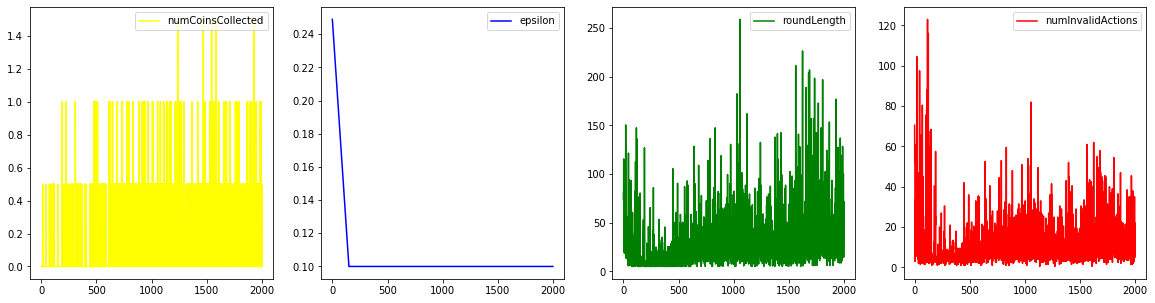

In [239]:
plot_average_histories("histories/",["numCoinsCollected","epsilon","roundLength",'numInvalidActions'])